改特征选择方法 来自于KAGGLE HOME CREDIT CARD 比赛分享的代码，修改了部分小细节

#### 读取数据

In [1]:
import PandasTools
data_path = "/Users/xiaolin/Downloads/DDFG5.txt"
pt = PandasTools.PandasTools(data_path, sep="\t")
df = pt.read_data()
df.head()

Reading Data Chunks  1
Iteration is stopped.
Read Data Done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732442 entries, 0 to 3732441
Data columns (total 7 columns):
b.days            float32
delta             float32
a.userid          uint32
a.shopid          uint32
a.recent_delta    uint8
a.weekend         uint8
d.is_clicked      uint8
dtypes: float32(2), uint32(2), uint8(3)
memory usage: 67.6 MB
None


,b.days,delta,a.userid,a.shopid,a.recent_delta,a.weekend,d.is_clicked
0,15.0,12.0,2848,57194480,27,0,0
1,15.0,12.0,2848,57194480,27,0,0
2,15.0,12.0,2848,57194480,27,0,0
3,15.0,12.0,2848,57194480,27,0,0
4,15.0,12.0,2848,57194480,27,0,0


#### 导入特征选择类
1. 选择特征的类应该放在项目的同意目录下
2. 如果不放在同一个目录下，需要在jupyter 中引用一下
import sys
sys.path.append("yourlocalpath")

In [2]:
import feature_selector

train = df.drop("d.is_clicked", axis=1)
fs = feature_selector.FeatureSelector(data=train, labels=df["d.is_clicked"])

#### 缺失率计算

In [15]:
fs.identify_missing(0.8)  # 缺失率大于0.8 的变量没有

0 features with greater than 0.80 missing values.



In [19]:
fs.identify_missing(0.1)  # 缺失率大于0.1 的变量
print(fs.ops["missing"][:10])  #确实大于0.1的变量的前10个
fs.missing_stats.head(10)  # 全部变量的缺失率数据

2 features with greater than 0.10 missing values.

['b.days', 'delta']


,missing_fraction
b.days,0.306945
delta,0.306945
a.userid,0.000000
a.shopid,0.000000
a.recent_delta,0.000000
a.weekend,0.000000


一般情况下，缺失率大于0.9的特征基本上都会被扔掉。除非特征在模型中的权重非常高，这个时候一般会对这个特征做进一步的衍生。

#### 查看单一值的变量

0 features with a single unique value.

[]


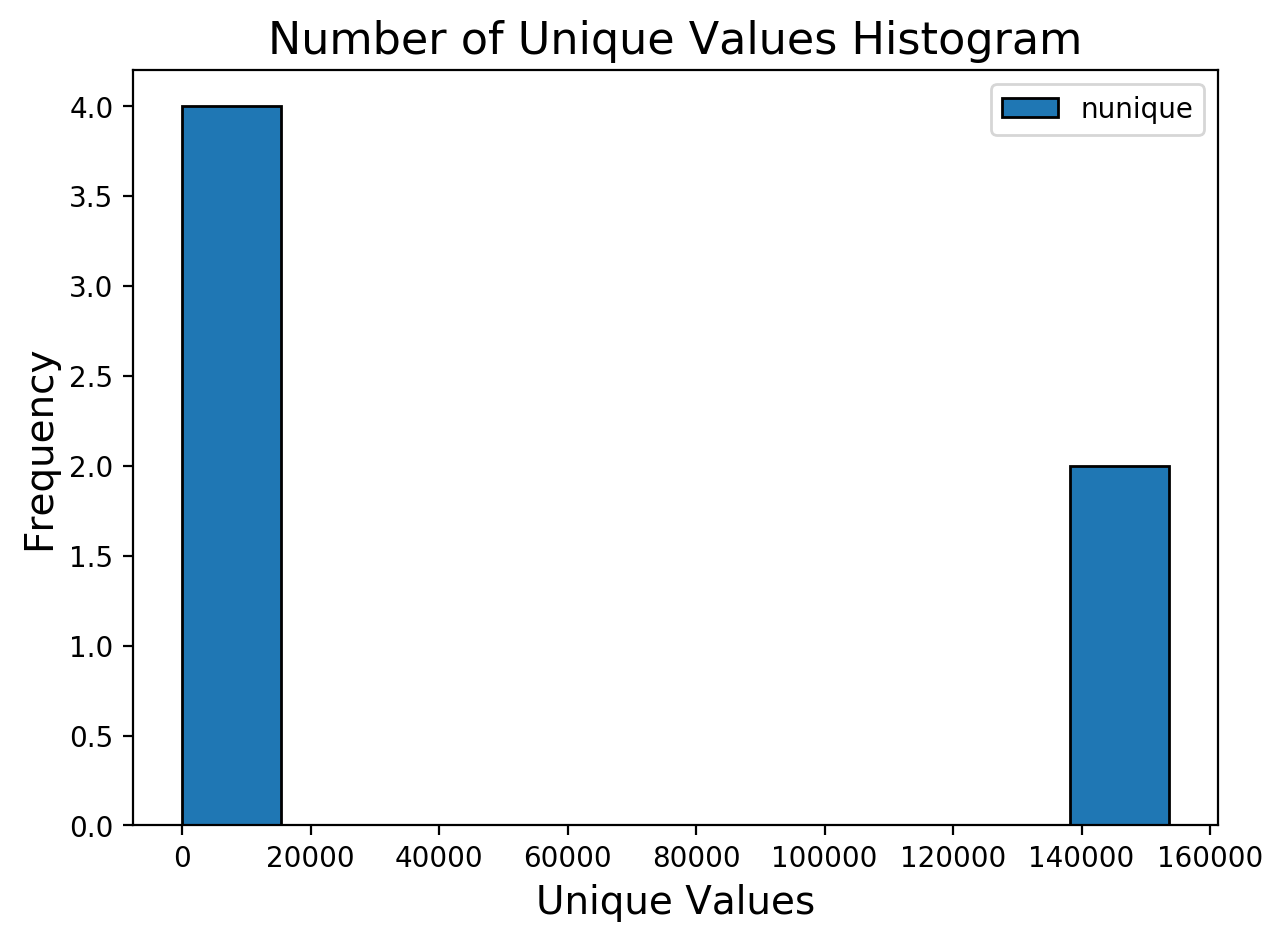

In [21]:
fs.identify_single_unique()
print(fs.ops["single_unique"])
fs.plot_unique()

没有变量有单一值，上图请忽略

#### 相关性分析

1 features with a correlation magnitude greater than 0.90.

['a.recent_delta']


,drop_feature,corr_feature,corr_value
0,a.recent_delta,delta,0.949965


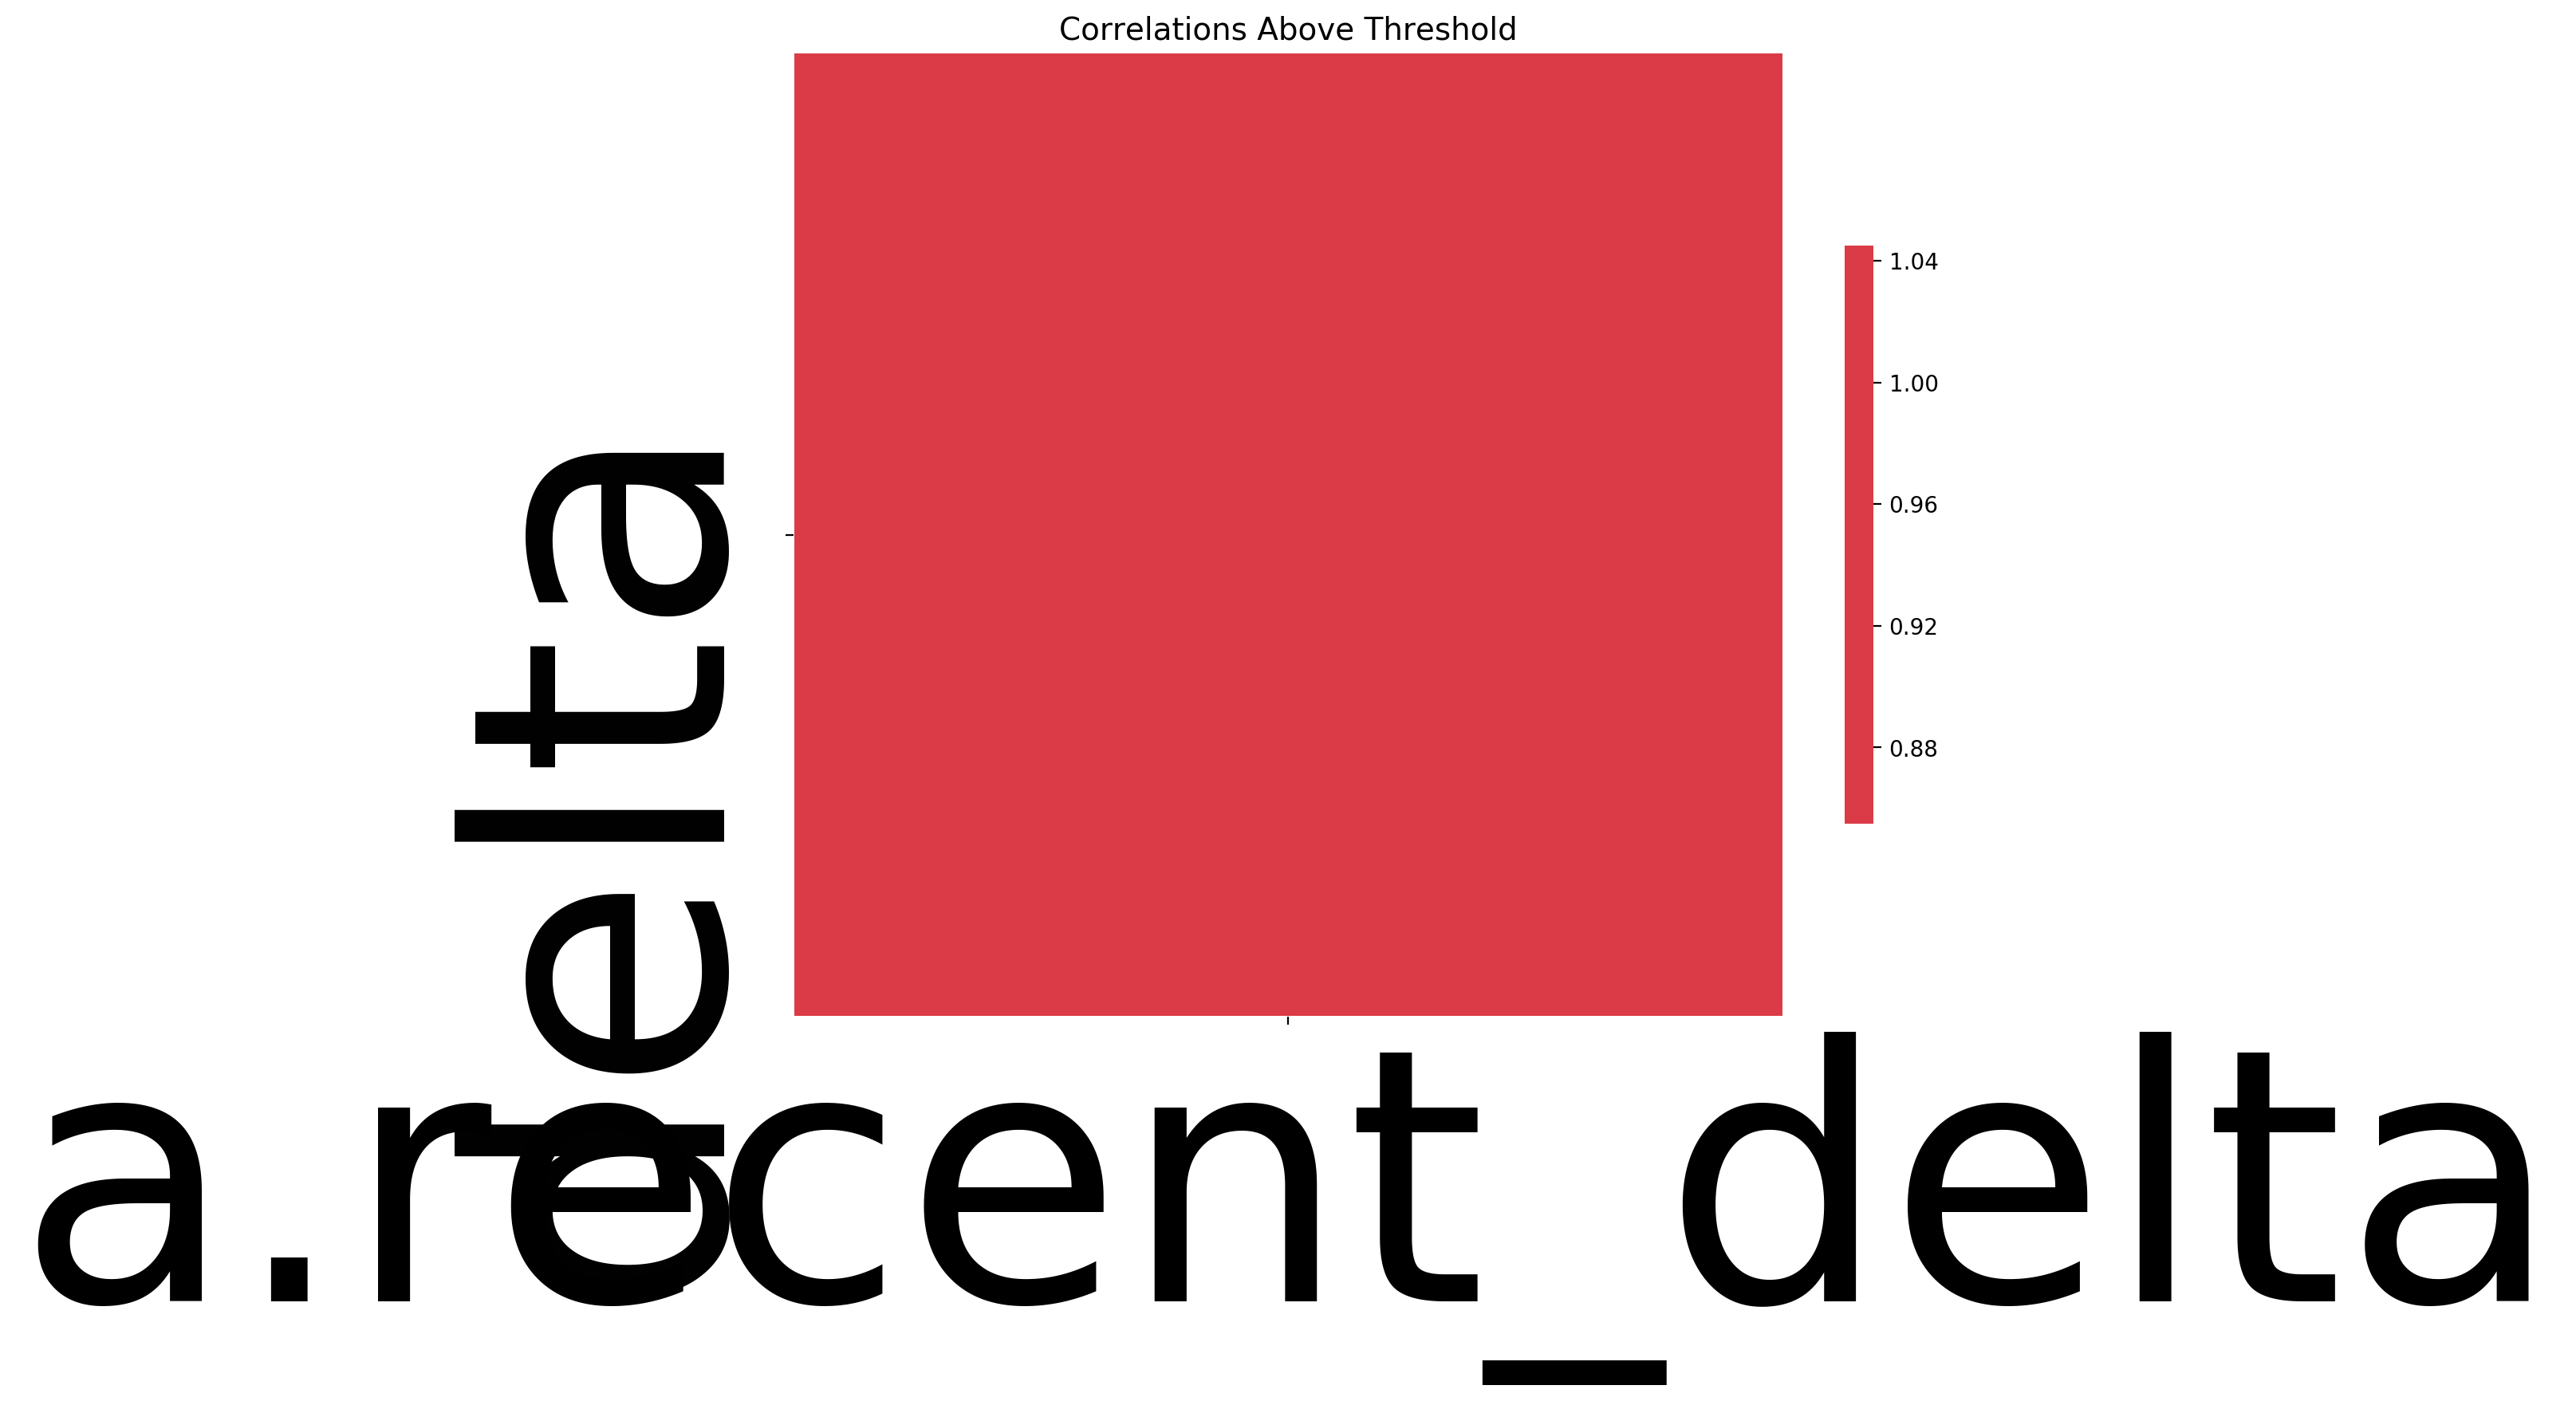

In [26]:
fs.identify_collinear(0.9)  # 筛选相关性大于0.8的变量
print(fs.ops["collinear"][:10])  # 打印出来的是建议扔掉的变量，每一次跑出来的都不一样，这个仅作为参考
fs.plot_collinear()  # 图画的太难看了
fs.record_collinear.head(10)  # 查看相关性最高的10个变量

一般相关性分析都是分析皮尔森相关系数，这个得到的线性相关性。还有其他的犯法例如斯皮尔曼相关性（鲁棒性更好），VIF方差膨胀因子，马氏距离等

#### 变量的重要性

In [3]:
fs.identify_zero_importance(task="classification",eval_metric="auc",n_iterations=10,early_stopping=True)

Training Gradient Boosting Model

(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.740312
(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.737617
(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.740403
(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.736793
(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.738512
(3732442, 6) (3732442,)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[

[]


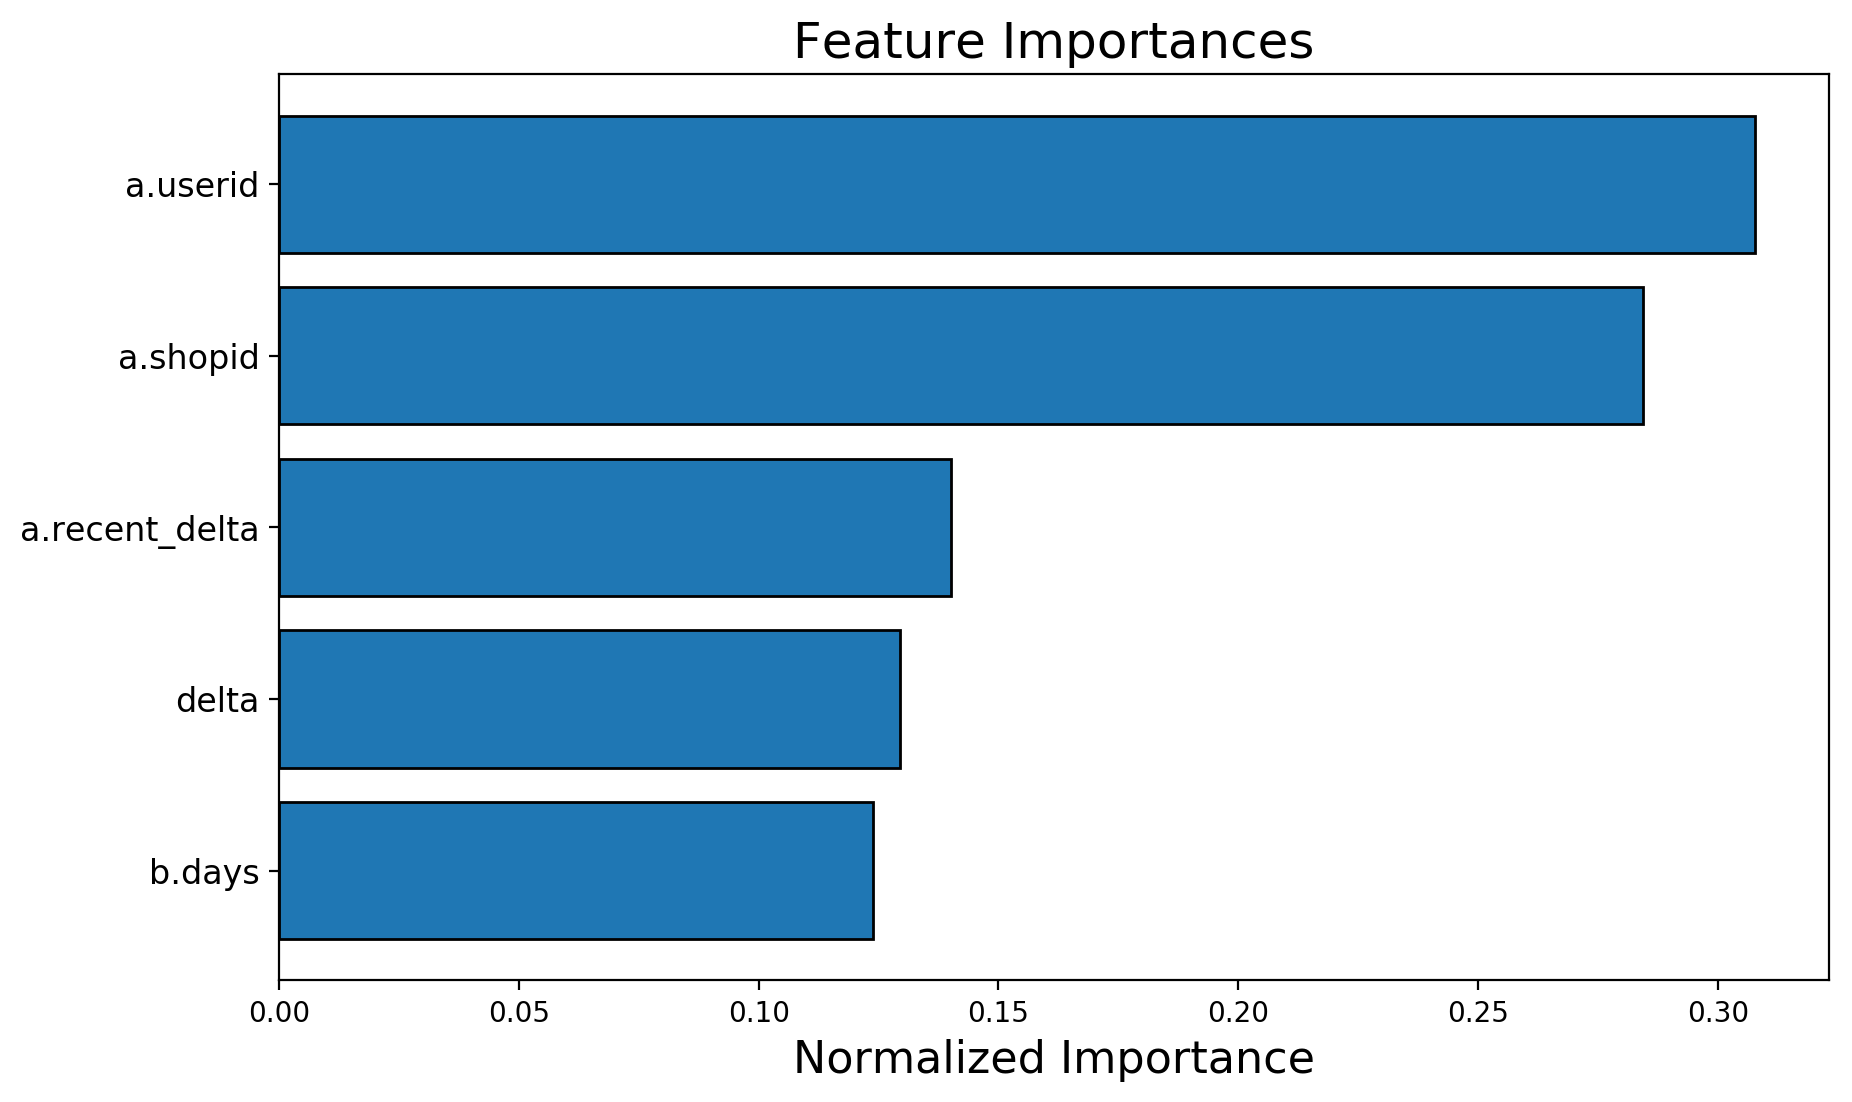

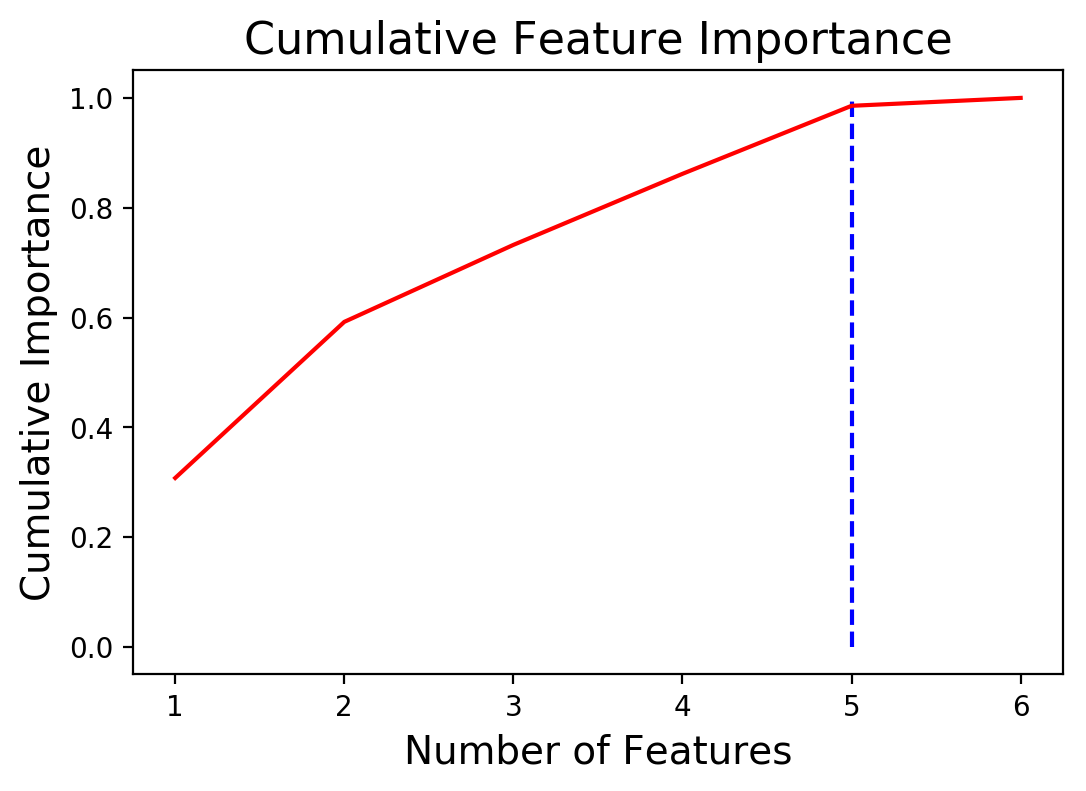

5 features required for 0.95 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,a.userid,9233.7,0.307790,0.307790
1,a.shopid,8529.6,0.284320,0.592110
2,a.recent_delta,4205.9,0.140197,0.732307
3,delta,3882.0,0.129400,0.861707
4,b.days,3716.6,0.123887,0.985593
5,a.weekend,432.2,0.014407,1.000000


In [10]:
print(fs.ops["zero_importance"]) # 没有重要性的变量
fs.plot_feature_importances(threshold=0.95,plot_n=20) #变量重要性分布
fs.feature_importances.head(100) # 查看前100重要性的变量